# Stacked Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

yelp_data = pd.read_csv('yelp_data_sentiment.csv')

In [2]:
level0=list()

In [3]:
import pickle

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
clf=pickle.load(open('lr.sav', 'rb'))

In [6]:
level0.append(('lr',clf))

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
clf=pickle.load(open('rf.sav', 'rb'))

In [9]:
level0.append(('rf',clf))

In [10]:
from sklearn.svm import SVC

In [11]:
clf=pickle.load(open('svc.sav', 'rb'))

In [12]:
level0.append(('svc',clf))

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

In [14]:
clf=pickle.load(open('gbc.sav', 'rb'))

In [15]:
level0.append(('gbc',clf))

In [16]:
level0

[('lr',
  GridSearchCV(cv=10,
               estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                         ('lr', LogisticRegression())]),
               param_grid={'lr__C': [0.01, 0.1, 1, 10, 100]}, scoring='accuracy')),
 ('rf',
  GridSearchCV(cv=10,
               estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                         ('rf', RandomForestClassifier())]),
               param_grid={'rf__max_features': ['auto', 'sqrt'],
                           'rf__n_estimators': [10, 20, 30, 40, 50]},
               scoring='accuracy')),
 ('svc',
  GridSearchCV(cv=3,
               estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                         ('svc',
                                          SVC(gamma='auto', kernel='linear'))]),
               param_grid={'svc__C': [0.01, 0.1, 1]}, scoring='accuracy')),
 ('gbc',
  GridSearchCV(cv=10,
               estimator=Pipeline(steps=[('scaler', St

In [17]:
level1=LogisticRegression()

In [6]:
from sklearn.ensemble import StackingClassifier

In [7]:
X = yelp_data.iloc[0:,4:]
y = yelp_data.Sentiment

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=7)

In [22]:
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=3)

In [23]:
model.fit(X_train,y_train)

StackingClassifier(cv=3,
                   estimators=[('lr',
                                GridSearchCV(cv=10,
                                             estimator=Pipeline(steps=[('scaler',
                                                                        StandardScaler()),
                                                                       ('lr',
                                                                        LogisticRegression())]),
                                             param_grid={'lr__C': [0.01, 0.1, 1,
                                                                   10, 100]},
                                             scoring='accuracy')),
                               ('rf',
                                GridSearchCV(cv=10,
                                             estimator=Pipeline(steps=[('scaler',
                                                                        StandardScaler()),
                                                

In [24]:
test_accuracy = model.score(X_test, y_test)

In [25]:
print(test_accuracy)

0.7710237659963437


In [26]:
filename = 'stacked_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [11]:
import pickle

final_model=pickle.load(open('stacked_model.sav', 'rb'))

In [12]:
from sklearn.metrics import make_scorer, accuracy_score, f1_score

In [14]:
results = final_model.predict(X_test)

In [15]:
test_accuracy = final_model.score(X_test, y_test)
f1_accuracy = f1_score(y_test,results,average='macro')
f1_accuracym = f1_score(y_test,results,average='micro')
f1_accuracyw = f1_score(y_test,results,average='weighted')
print("Accuracy on test data: " ,test_accuracy)
print('F1 Score (macro): ', f1_accuracy)
print('F1 Score (micro): ', f1_accuracym)
print('F1 Score (weighted): ', f1_accuracyw)

Accuracy on test data:  0.7710237659963437
F1 Score (macro):  0.7773106101668689
F1 Score (micro):  0.7710237659963437
F1 Score (weighted):  0.7716653809353897


In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
cm = confusion_matrix(y_test, results, labels=None, sample_weight=None)
cm

array([[230,   1,  67,   4],
       [  1, 357,   3, 101],
       [ 36,   3, 452, 103],
       [  3,  74, 105, 648]], dtype=int64)

In [19]:
cm_df =  pd.DataFrame(cm, index= [i for i in ['Negative','Positive',
                                               'Slightly Negative',
                                              'Slightly Positive']],
                     columns= [i for i in ['Negative','Positive',
                                               'Slightly Negative',
                                              'Slightly Positive']])

<AxesSubplot:>

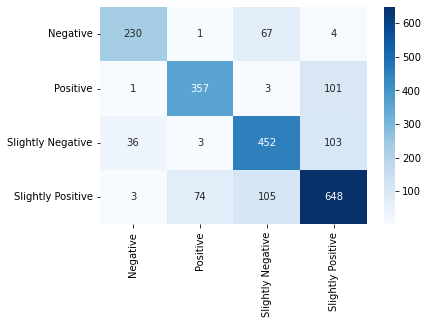

In [20]:
import seaborn as sns
sns.heatmap(cm_df, annot=True,cmap='Blues',fmt='g')